### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable is word **category** - congruent and incongruent.<br>
Dependent variable is **the time it takes to name the ink colors**.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Null: congruent words and incongruent words take the same time to name the the ink colors, the mean values are equal. Because null is generally assumed to be true until evidence indicates otherwise.**

**Alternative: incongruent words take different time to name the ink colors, the mean values are different. Because we can assume it may be harder to name the ink when names do not match the colors.**

$$H_0: \mu_{conw} - \mu_{incw} = 0$$

$$H_1: \mu_{conw} - \mu_{incw} \neq 0$$ 


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline

import scipy.stats as stats

df = pd.read_csv("stroopdata.csv")
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.shape, df.isnull().values.any()

((24, 2), False)

In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**Sample mean for Congruent is 14.051125 seconds, sample mean for Incongruent is 22.015917 seconds.
Sample standard deviation for Congruent is 3.559358 seconds, sample standard deviation for Incongruent is 4.797057 seconds.**

**From mean observations, we have some (unproven) evidence for alternative hypothesis (reject the null).
From std observations, we can see that Incongruent values are more dispersed than Congruent values.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

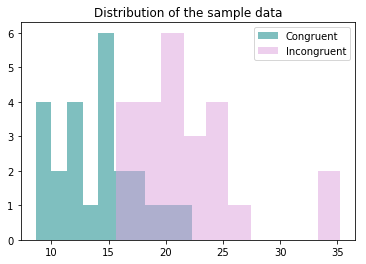

In [4]:
plt.hist(df['Congruent'], alpha=0.5, label='Congruent', color="teal")
plt.hist(df['Incongruent'], alpha=0.5, label='Incongruent', color="plum")

plt.legend(loc='upper right')

plt.title('Distribution of the sample data')
plt.show()

**As we saw earlier from the measures of central tendency and variability, Incongruent data seem to have higher values, as well as is more dispersed.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
# Our sample size is < 30, so we opt for a t-test in this case
# This is a two-sided test for the null hypothesis that 2 related samples have identical average (expected) values.

statistic, pvalue = stats.ttest_rel(df['Congruent'], df['Incongruent']) # Calculate the T-test on TWO RELATED samples of scores
statistic, pvalue

(-8.020706944109957, 4.1030005857111781e-08)

In [6]:
threshold = 0.05

pvalue < threshold # Reject the null?

True

**Confidence level is 95% / Type I error associated with our test is 0.05.**<br>
**Conclusion regarding the hypotheses: we reject the null.**<br>
**Did the results match up with our expectations? Yes, this is what we inicially observed.**